UNDIFFERENCED DATA

In [1]:
#Importing standard libraries
import pandas as pd
from pandas import Series
import numpy as np

In [2]:
#Reading the data from TSLA_Precovid_data.csv
rawdataset_precovid = pd.read_csv("TSLA_Precovid_data.csv")
print(rawdataset_precovid.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
1  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
3  2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500
4  2010-07-08  3.228  3.504  3.114  3.492      3.492  38557000


In [3]:
#Checking the number of null values in dataset
print(rawdataset_precovid.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
#Checking the number of NA values in dataset
print(rawdataset_precovid.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
#since we only require the closing price and date column
#for time series analysis we will store them into TSA_data
TSA_data = [rawdataset_precovid['Date'], rawdataset_precovid['Close']]

`TSA_data = [rawdataset_precovid['Date'], rawdataset_precovid['Close']]` gives the following format of data we therefore transpose it to get a proper format





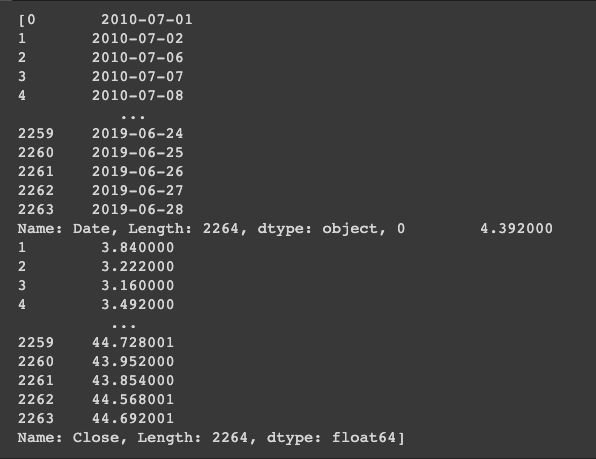

In [6]:
#Transposing the dataset TSA_data
TSA_data = pd.DataFrame(TSA_data).transpose()
#looking at a sample of TSA_data
print(TSA_data.head())

         Date  Close
0  2010-07-01  4.392
1  2010-07-02   3.84
2  2010-07-06  3.222
3  2010-07-07   3.16
4  2010-07-08  3.492


In [7]:
#Setting Date column as index
TSA_data = TSA_data.set_index(TSA_data['Date'])
#printing a subset (1st 6 rows) of TSA_data
print(TSA_data.head())

                  Date  Close
Date                         
2010-07-01  2010-07-01  4.392
2010-07-02  2010-07-02   3.84
2010-07-06  2010-07-06  3.222
2010-07-07  2010-07-07   3.16
2010-07-08  2010-07-08  3.492


In [8]:
#Date column is made the index but we dont need it both as an index
#and as a column. Therefore we only keep Closing price column and discard the Date column
TSA_data = TSA_data['Close']
print(TSA_data.head())

Date
2010-07-01    4.392
2010-07-02     3.84
2010-07-06    3.222
2010-07-07     3.16
2010-07-08    3.492
Name: Close, dtype: object


In [9]:
#Removng the index name ('Date')
TSA_data.index.name = None
print(TSA_data.head())
#Converting the dataset into pandas series as the describe() function
#of series will give us the insights of the Time Series Data
TSA_data = Series(TSA_data)
print(TSA_data)

2010-07-01    4.392
2010-07-02     3.84
2010-07-06    3.222
2010-07-07     3.16
2010-07-08    3.492
Name: Close, dtype: object
2010-07-01     4.392
2010-07-02      3.84
2010-07-06     3.222
2010-07-07      3.16
2010-07-08     3.492
               ...  
2019-06-24    44.728
2019-06-25    43.952
2019-06-26    43.854
2019-06-27    44.568
2019-06-28    44.692
Name: Close, Length: 2264, dtype: object


In [10]:
#converting the date index to date format
TSA_data.index = pd.to_datetime(TSA_data.index).date
print(TSA_data.index)

Index([2010-07-01, 2010-07-02, 2010-07-06, 2010-07-07, 2010-07-08, 2010-07-09,
       2010-07-12, 2010-07-13, 2010-07-14, 2010-07-15,
       ...
       2019-06-17, 2019-06-18, 2019-06-19, 2019-06-20, 2019-06-21, 2019-06-24,
       2019-06-25, 2019-06-26, 2019-06-27, 2019-06-28],
      dtype='object', length=2264)


In [11]:
#For ACF/PACF plots we need to convert it into float instead of object type
TSA_data = TSA_data.astype(float)
print(TSA_data.dtypes)
print(TSA_data)

float64
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
2010-07-07     3.160000
2010-07-08     3.492000
                ...    
2019-06-24    44.728001
2019-06-25    43.952000
2019-06-26    43.854000
2019-06-27    44.568001
2019-06-28    44.692001
Name: Close, Length: 2264, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


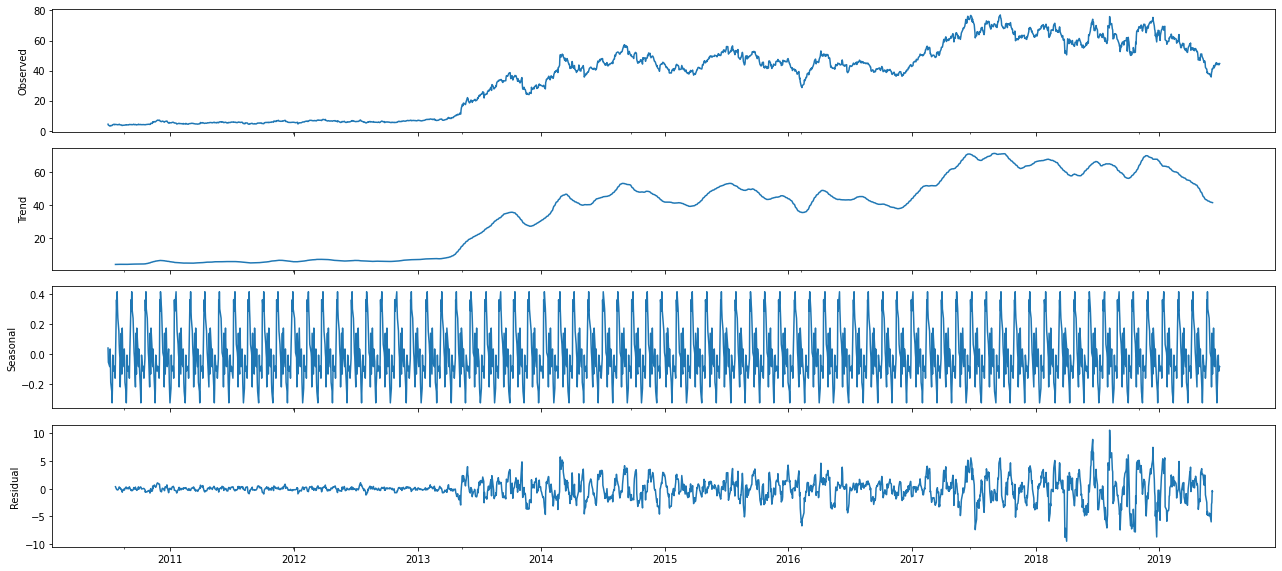

In [12]:
#Decomposition of each component of Time series analysis
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(TSA_data, freq = 30)
fig = decomposition.plot()
plt.show()

In [13]:
#Quick analysis of data
print(TSA_data.describe())

count    2264.000000
mean       35.562545
std        22.867151
min         3.160000
25%         6.728000
50%        41.419001
75%        52.414501
max        77.000000
Name: Close, dtype: float64


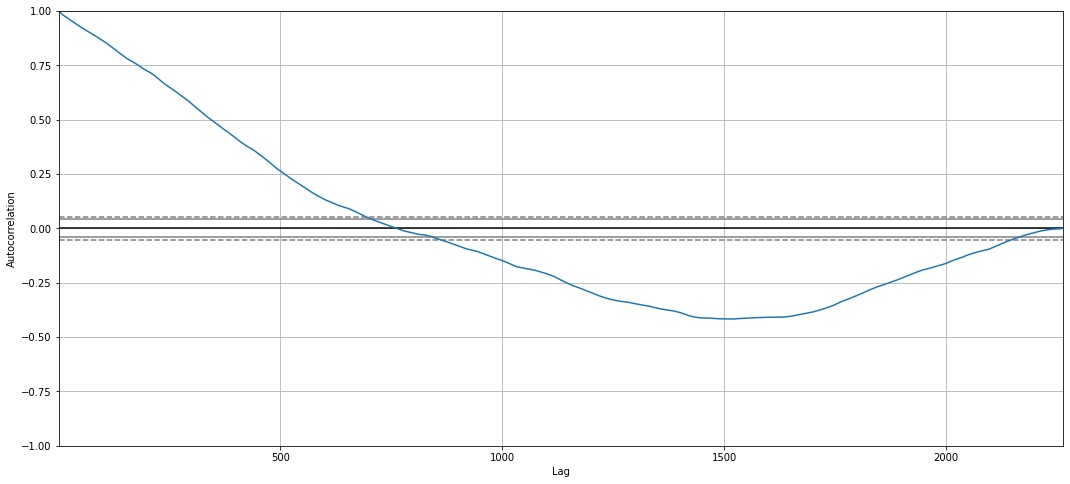

In [14]:
#To check auto correlation of our unprocessed data
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

autocorrelation_plot(TSA_data)
pyplot.show()


References: https://machinelearningmastery.com/white-noise-time-series-python/

If a series is white noise it has mean close to zero, constant variance and zero correlation. Since our series has mean significantly larger than 0, ie 35.562545 the variance is 22.867151 which is again far from 1 (constant) and the correlation plot shows some correlation, the series is not white noise. Since the series is not white noise, it is predictable and we can proceed with time series analysis further.

In [15]:
#To check if our time series (unprocessed raw data) is stationary
#or not we will use the Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
result = adfuller(TSA_data)
#Reference: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
#result[0] is the
print('Augmented Dickey-Fuller Statistic: ',result[0])
#result[1] is the
print('p-value: ', result[1])
#result[2] is the
print('Number of lags: ', result[2])
#result[3] is the
print('Number of observations: ', result[3])
#result[4] is the
print('Critical Values:')
for key, value in result[4].items():
  print(key,value)
  #	print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller Statistic:  -1.6060694964303681
p-value:  0.48054391718648154
Number of lags:  0
Number of observations:  2263
Critical Values:
1% -3.4332429443649977
5% -2.8628180286284888
10% -2.5674503540754072


Reference: https://machinelearningmastery.com/time-series-data-stationary-python/

Null Hypothesis (H0): If the null hypothesis is not rejected it means that the series has a unit root suggesting its non-stationarity.

Alternate Hypothesis (H1): If the null hypothesis is rejected (Meaning alternate hypothesis is accepted) it suggests that the series is stationary and does not have a unit root.

DO NOT REJECT NULL HYPOTHESIS IF p-value > 0.05 REJECT NULL HYPOTHESIS IF p-value <= 0.05

Since our series has p value 0.48 which is highly above 0.05 threshold, we DO NOT REJECT THE NULL HYPOTHESIS. This means that our series in NON-STATIONARY

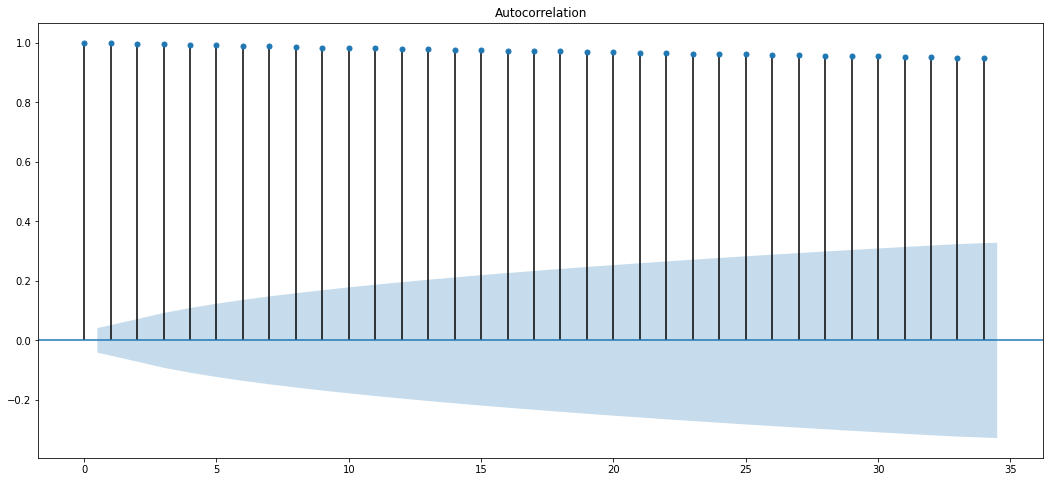

In [16]:
#ACF plot for Raw data
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(TSA_data)
pyplot.show()

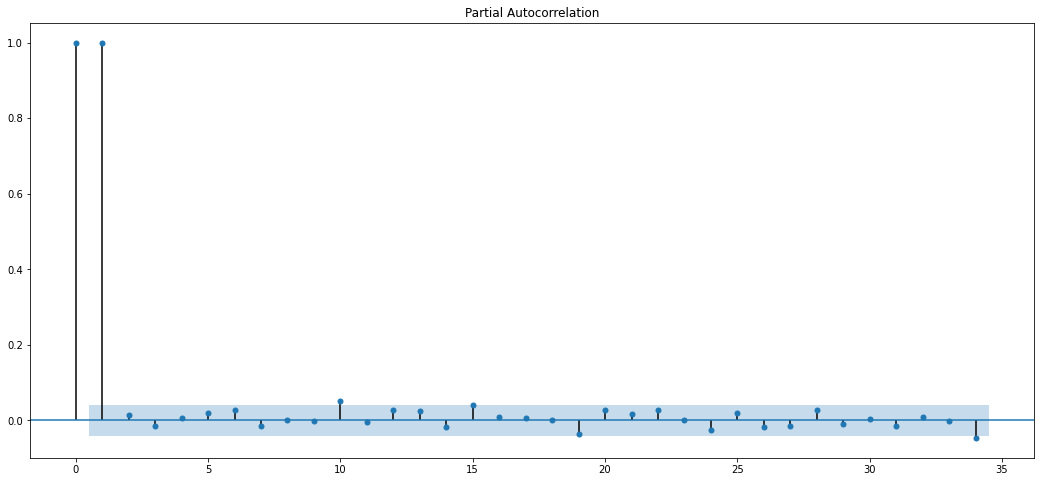

In [17]:
#PACF Plot for raw data
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(TSA_data)
pyplot.show()

Since our Data is not stationary we cannot use ARMA model. We will have to difference the data and make it stationary before using ARMA model. We need the I- Integrated component of the ARIMA model for our non-stationary data.

In [18]:
#creating possible combinations of (p,d,q) parameters
#for ARIMA model. The best one (with best AIC/BIC score) will be chosen
import itertools
p = range(1,5)
q= range(1,5)
d= range(1,3) #starting with 1 not 0 bcoz data is not stationary
possible_combinations = list(itertools.product(p, d, q))
#Printing all possible combinations of p, d and q parameters of ARIMA model
print(possible_combinations)

[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


In [19]:
len(possible_combinations)

32

In [20]:
#All the data after the date of 2018-01-01 will be
#used for testing
test_data= {}
for ind in (TSA_data.index):
  if ind >= pd.to_datetime('2018-01-01'):
    test_data[ind] = TSA_data[ind]

In [21]:
print(len(test_data))

375


In [22]:
#All the data after the date of 2018-01-01 will be
#used for testing
train_data= {}
for ind in (TSA_data.index):
  if ind < pd.to_datetime('2018-01-01'):
    train_data[ind] = TSA_data[ind]

In [23]:
print(len(train_data))

1889


In [24]:
#import ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#THIS TAKES SOME TIME
param_AIC = {}
param_BIC = {}

for pc in possible_combinations:
  #for each possible combination
  try:
    #create an ARIMA model
    arima_model = ARIMA(Series(train_data), order = pc)
    #fit it
    fitted_model = arima_model.fit()
    #print the AIC and BIC score
    print("ARIMA parameters: order- ",pc,"AIC is ",fitted_model.aic)
    print("ARIMA parameters: order- ",pc,"BIC is ",fitted_model.bic)
    #Save it for future reference
    param_AIC[pc] = fitted_model.aic
    param_BIC[pc] = fitted_model.bic
  except:
    continue

ARIMA parameters: order-  (1, 1, 1) AIC is  5219.278555976881
ARIMA parameters: order-  (1, 1, 1) BIC is  5241.451649363703
ARIMA parameters: order-  (1, 2, 1) AIC is  5224.991370363539
ARIMA parameters: order-  (1, 2, 1) BIC is  5247.162344545013
ARIMA parameters: order-  (1, 2, 2) AIC is  5226.934713629115
ARIMA parameters: order-  (1, 2, 2) BIC is  5254.648431355958
ARIMA parameters: order-  (1, 2, 3) AIC is  5227.098552203829
ARIMA parameters: order-  (1, 2, 3) BIC is  5260.355013476041
ARIMA parameters: order-  (1, 2, 4) AIC is  5229.778776112701
ARIMA parameters: order-  (1, 2, 4) BIC is  5268.577980930281
ARIMA parameters: order-  (2, 1, 1) AIC is  5219.469723050625
ARIMA parameters: order-  (2, 1, 1) BIC is  5247.1860897841525
ARIMA parameters: order-  (2, 2, 1) AIC is  5226.8133986350285
ARIMA parameters: order-  (2, 2, 1) BIC is  5254.527116361871
ARIMA parameters: order-  (2, 2, 2) AIC is  5228.926075316068
ARIMA parameters: order-  (2, 2, 2) BIC is  5262.18253658828
ARIMA p

In [ ]:
#Store all the AIC scores in param_temp_AIC
#computations will be done on this not on original param_AIC
param_temp_AIC = param_AIC
#Getting the top 3 AIC scores
for limit in range(0,3):
  #store the minimum (best) AIC in min_AIC
  min_AIC= min(param_temp_AIC.values())
  #search the value in param_temp_AIC
  for key, value in list(param_temp_AIC.items()):
    #If found, delete it, so the next minimum value
    #can be stored, matched and printed.
    if value == min_AIC:
      del param_temp_AIC[key]
      print("Parameter with best AIC",min_AIC," is ",key)


Parameter with best AIC 5219.278555976881  is  (1, 1, 1)
Parameter with best AIC 5219.469723050625  is  (2, 1, 1)
Parameter with best AIC 5219.953036925085  is  (3, 1, 1)


In [ ]:
#Store all the AIC scores in param_temp_BIC
#computations will be done on this not on original param_BIC
param_temp_BIC = param_BIC
#Getting the top 3 BIC scores
for limit in range(0,3):
  #store the minimum (best) BIC in min_BIC
  min_BIC= min(param_temp_BIC.values())
  #search the value in param_temp_BIC
  for key, value in list(param_temp_BIC.items()):
    #If found, delete it, so the next minimum value
    #can be stored, matched and printed.
    if value == min_BIC:
      del param_temp_BIC[key]
      print("Parameter with best BIC",min_BIC," is ",key)


Parameter with best BIC 5241.451649363703  is  (1, 1, 1)
Parameter with best BIC 5247.162344545013  is  (1, 2, 1)
Parameter with best BIC 5247.1860897841525  is  (2, 1, 1)


In [25]:
import warnings
warnings.filterwarnings("ignore")

ARIMA_predictions = {} #To store predictions
walk_forward =train_data #For walk forward validation

In [26]:
print(walk_forward)

{datetime.date(2010, 7, 1): 4.392, datetime.date(2010, 7, 2): 3.84, datetime.date(2010, 7, 6): 3.222, datetime.date(2010, 7, 7): 3.16, datetime.date(2010, 7, 8): 3.492, datetime.date(2010, 7, 9): 3.48, datetime.date(2010, 7, 12): 3.41, datetime.date(2010, 7, 13): 3.628, datetime.date(2010, 7, 14): 3.968, datetime.date(2010, 7, 15): 3.978, datetime.date(2010, 7, 16): 4.128, datetime.date(2010, 7, 19): 4.382, datetime.date(2010, 7, 20): 4.06, datetime.date(2010, 7, 21): 4.044, datetime.date(2010, 7, 22): 4.2, datetime.date(2010, 7, 23): 4.258, datetime.date(2010, 7, 26): 4.19, datetime.date(2010, 7, 27): 4.11, datetime.date(2010, 7, 28): 4.144, datetime.date(2010, 7, 29): 4.07, datetime.date(2010, 7, 30): 3.988, datetime.date(2010, 8, 2): 4.184, datetime.date(2010, 8, 3): 4.39, datetime.date(2010, 8, 4): 4.252, datetime.date(2010, 8, 5): 4.09, datetime.date(2010, 8, 6): 3.918, datetime.date(2010, 8, 9): 3.92, datetime.date(2010, 8, 10): 3.806, datetime.date(2010, 8, 11): 3.58, datetime.d

In [27]:
#building ARIMA(1,1,1) since it had the best AIC and BIC score
#for each key, value pair in test_data
for t, _ in test_data.items():
  try:

    #create ARIMA model with training data
    model = ARIMA(Series(walk_forward), order=(1,1,1))
   #fit the model
    model_fit = model.fit()
   #forecast and store the result
    forecast_results = model_fit.forecast()
   #forecast() method gives forecast, standard error and confidence interval
   #store the forecast in predictions dictionary
   #t= date will act as key whereas forecasted value will act as value
    ARIMA_predictions[t] = forecast_results[0]
    #Store the observed value for walk_forward validation
    walk_forward[t] = (test_data[t])
    print('predicted=%f, expected=%f' %(ARIMA_predictions[t], test_data[t]))
  except:
    continue

predicted=62.270867, expected=64.106003
predicted=64.202105, expected=63.450001
predicted=63.461600, expected=62.924000
predicted=62.933022, expected=63.316002
predicted=63.358519, expected=67.281998
predicted=67.461934, expected=66.737999
predicted=66.759960, expected=66.959999
predicted=66.998958, expected=67.589996
predicted=67.644929, expected=67.244003
predicted=67.265248, expected=68.012001
predicted=68.070512, expected=69.431999
predicted=69.517619, expected=68.914001
predicted=68.932000, expected=70.003998
predicted=70.074244, expected=70.311996
predicted=70.359011, expected=70.557999
predicted=70.601153, expected=69.178001
predicted=69.163161, expected=67.528000
predicted=67.496417, expected=68.570000
predicted=68.635054, expected=69.905998
predicted=69.988875, expected=69.164001
predicted=69.173013, expected=70.862000
predicted=70.952845, expected=69.849998
predicted=69.852776, expected=68.750000
predicted=68.742970, expected=66.625999
predicted=66.578980, expected=66.793999


Root Mean Square Error is  2.092745986834846


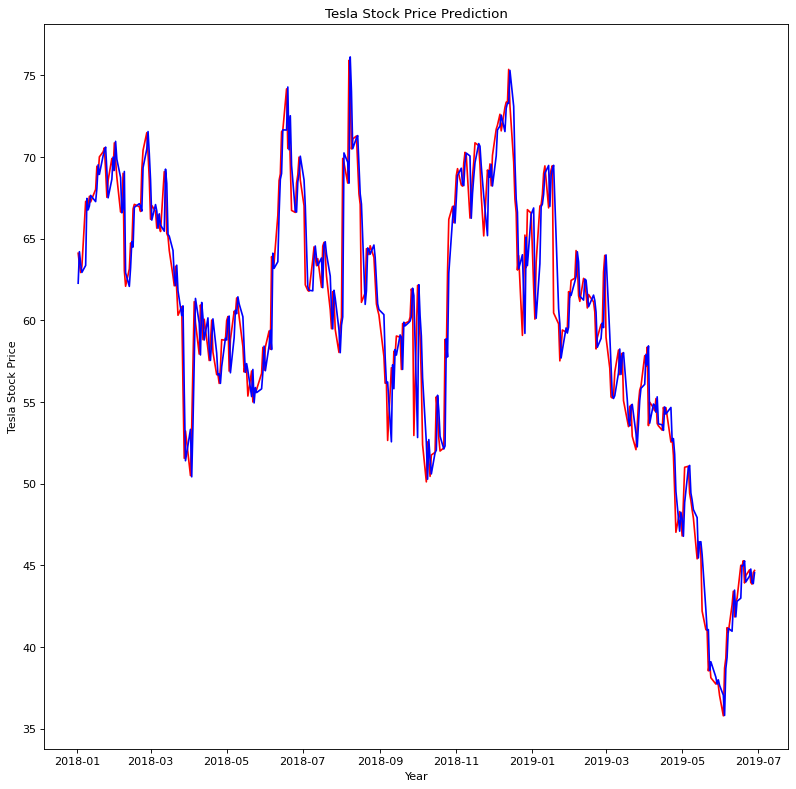

In [28]:
from math import sqrt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
ARIMA_predictions_series = Series(ARIMA_predictions)
test_data_series = Series(test_data)
# final_pred_series.index = test_series.index
#Calculating Root mean square error of forecasted and actual values
rmse = sqrt(mean_squared_error(test_data_series, ARIMA_predictions_series))
print('Root Mean Square Error is ', rmse)
#Plotting predictions in Red and actual values in Blue
figure(figsize=(12, 12), dpi=80)
pyplot.plot(test_data_series, color = 'red', label = 'Actual Tesla Stock Prices')
pyplot.plot(ARIMA_predictions_series, color='blue', label = 'Predicted Tesla Stock Prices')
pyplot.title('Tesla Stock Price Prediction')
pyplot.xlabel('Year')
pyplot.ylabel('Tesla Stock Price')
pyplot.show()



In [29]:
print(ARIMA_predictions_series)

2018-01-02      [62.2708667106497]
2018-01-03      [64.2021053232137]
2018-01-04     [63.46160010149146]
2018-01-05     [62.93302208717989]
2018-01-08    [63.358519453834454]
                      ...         
2019-06-24     [44.34618958695294]
2019-06-25     [44.77797945750409]
2019-06-26     [43.95399315729145]
2019-06-27     [43.88656955409333]
2019-06-28      [44.5621859036784]
Length: 375, dtype: object


In [30]:
#Saving the results in an excel sheet

ARIMA_predictions_series.to_excel('ARIMAresults.xlsx')
test_data_series.to_excel('TruthValues.xlsx')

NEURAL NETWORK FOR TIME SERIES ANALYSIS

In [31]:
rawdataset_precovid.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


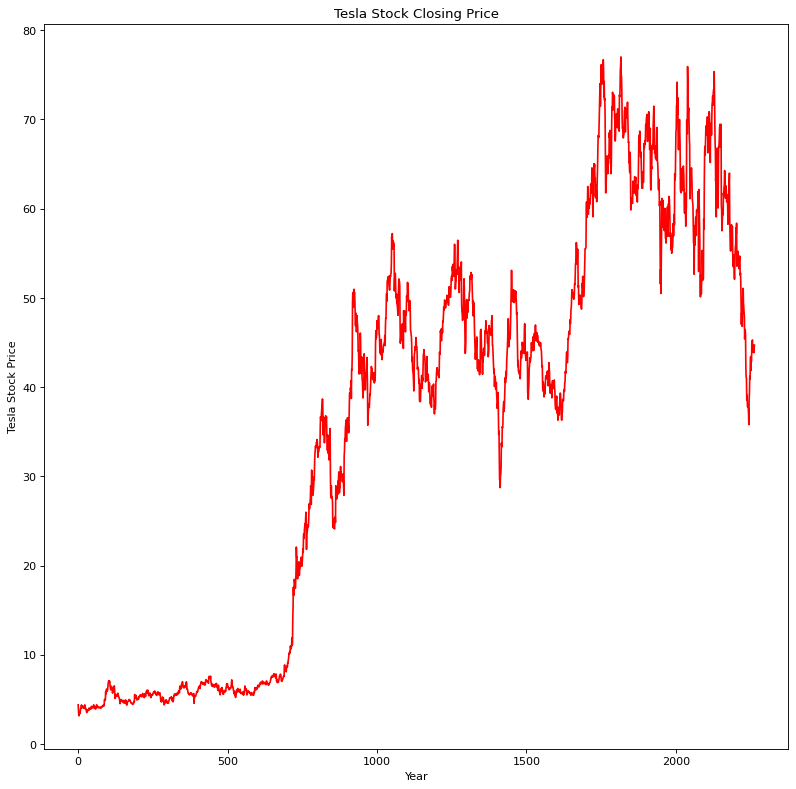

In [73]:
from math import sqrt
from matplotlib.pyplot import figure
#Plotting raw data
figure(figsize=(12, 12), dpi=80)
pyplot.plot(rawdataset_precovid['Close'], color = 'red', label = 'Raw Data')
pyplot.title('Tesla Stock Closing Price')
pyplot.xlabel('Year')
pyplot.ylabel('Tesla Stock Price')
pyplot.show()

In [32]:
#since we only require the closing price and date column
#for time series analysis we will store them into RNN_data
#Note that TSA_data is not being reused for RNN as it is converted to series and
#not in appropriate format
RNN_data = [rawdataset_precovid['Date'], rawdataset_precovid['Close']]
#Transposing the dataset TSA_data
RNN_data = pd.DataFrame(RNN_data).transpose()
#looking at a sample of TSA_data
print(RNN_data.head())
#Setting Date column as index
RNN_data = RNN_data.set_index(RNN_data['Date'])
#printing a subset (1st 6 rows) of TSA_data
print(RNN_data.head())
#Date column is made the index but we dont need it both as an index
#and as a column. Therefore we only keep Closing price column and discard the Date column
RNN_data = RNN_data['Close']
print(RNN_data.head())
#Removng the index name ('Date')
RNN_data.index.name = None
print(RNN_data.head())

         Date  Close
0  2010-07-01  4.392
1  2010-07-02   3.84
2  2010-07-06  3.222
3  2010-07-07   3.16
4  2010-07-08  3.492
                  Date  Close
Date                         
2010-07-01  2010-07-01  4.392
2010-07-02  2010-07-02   3.84
2010-07-06  2010-07-06  3.222
2010-07-07  2010-07-07   3.16
2010-07-08  2010-07-08  3.492
Date
2010-07-01    4.392
2010-07-02     3.84
2010-07-06    3.222
2010-07-07     3.16
2010-07-08    3.492
Name: Close, dtype: object
2010-07-01    4.392
2010-07-02     3.84
2010-07-06    3.222
2010-07-07     3.16
2010-07-08    3.492
Name: Close, dtype: object


In [33]:
#converting the date index to date format
RNN_data.index = pd.to_datetime(RNN_data.index).date
print(RNN_data.index)

Index([2010-07-01, 2010-07-02, 2010-07-06, 2010-07-07, 2010-07-08, 2010-07-09,
       2010-07-12, 2010-07-13, 2010-07-14, 2010-07-15,
       ...
       2019-06-17, 2019-06-18, 2019-06-19, 2019-06-20, 2019-06-21, 2019-06-24,
       2019-06-25, 2019-06-26, 2019-06-27, 2019-06-28],
      dtype='object', length=2264)


In [34]:
#All the data after the date of 2018-01-01 will be
#used for testing
test= {}
for ind in (RNN_data.index):
  if ind >= pd.to_datetime('2018-01-01'):
    test[ind] = RNN_data[ind]

In [35]:
#All the data before the date of 2018-01-01 will be
#used for training
train= {}
for ind in (RNN_data.index):
  if ind < pd.to_datetime('2018-01-01'):
    train[ind] = RNN_data[ind]

In [36]:
#Converting training and testing set to Series
train = Series(train)
test = Series(test)
#Viewing their lengths (N.o of observations)
print("Training Data: ",train, "length is ", len(train))
print("Testing Data: ",test, "length is ", len(test))


Training Data:  2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
2010-07-07     3.160000
2010-07-08     3.492000
                ...    
2017-12-22    65.040001
2017-12-26    63.458000
2017-12-27    62.327999
2017-12-28    63.071999
2017-12-29    62.270000
Length: 1889, dtype: float64 length is  1889
Testing Data:  2018-01-02    64.106003
2018-01-03    63.450001
2018-01-04    62.924000
2018-01-05    63.316002
2018-01-08    67.281998
                ...    
2019-06-24    44.728001
2019-06-25    43.952000
2019-06-26    43.854000
2019-06-27    44.568001
2019-06-28    44.692001
Length: 375, dtype: float64 length is  375


In [37]:
#Z Normalisation on Test Set
#Calculating mean value and storing in test_mean
test_mean = test.values.mean()
#Calculating standard deviation and storing in test_std
test_std = test.values.std()
#A list to store normalsied values of test
normalised_test = []

#for each value in test
for val in test.values:
  #subtract mean from val and divide the result by standard deviation
  #update the value of val
  val = (val- test_mean)/test_std
  #append the value of val to list
  normalised_test.append(val)

#Convert list to Dataframe and view a subset
normalised_test = pd.DataFrame(normalised_test)
print(normalised_test.head())

          0
0  0.479994
1  0.401044
2  0.337738
3  0.384917
4  0.862230


In [38]:
#Z Normalisation on Training Set
#Calculating mean value and storing in train_mean
train_mean = train.values.mean()
#Calculating standard deviation and storing in train_std
train_std = train.values.std()
#A list to store normalsied values of train
normalised_train = []

#for each value in train
for val in train.values:
  #subtract mean from val and divide the result by standard deviation
  #update the value of val
  val = (val- train_mean)/train_std
  #append the value of val to list
  normalised_train.append(val)

#Convert list to Dataframe and view a subset
normalised_train = pd.DataFrame(normalised_train)
print(normalised_train.head())

          0
0 -1.213882
1 -1.239363
2 -1.267892
3 -1.270754
4 -1.255428


In [39]:
#Creating X and Y from Train
#The idea is:
#given values of last 30 days (will be stored in X)
#predict the value of current day (will be stored in Y)
print(normalised_train[0][0:31]) #value from 0 to 30
print(normalised_train[0][0:30]) #value from 0 to 29
print(normalised_train[0][30]) #only the 30th value

0    -1.213882
1    -1.239363
2    -1.267892
3    -1.270754
4    -1.255428
5    -1.255982
6    -1.259213
7    -1.249150
8    -1.233455
9    -1.232993
10   -1.226069
11   -1.214343
12   -1.229208
13   -1.229946
14   -1.222745
15   -1.220068
16   -1.223207
17   -1.226900
18   -1.225330
19   -1.228746
20   -1.232531
21   -1.223484
22   -1.213974
23   -1.220345
24   -1.227823
25   -1.235763
26   -1.235670
27   -1.240933
28   -1.251366
29   -1.254135
30   -1.247488
Name: 0, dtype: float64
0    -1.213882
1    -1.239363
2    -1.267892
3    -1.270754
4    -1.255428
5    -1.255982
6    -1.259213
7    -1.249150
8    -1.233455
9    -1.232993
10   -1.226069
11   -1.214343
12   -1.229208
13   -1.229946
14   -1.222745
15   -1.220068
16   -1.223207
17   -1.226900
18   -1.225330
19   -1.228746
20   -1.232531
21   -1.223484
22   -1.213974
23   -1.220345
24   -1.227823
25   -1.235763
26   -1.235670
27   -1.240933
28   -1.251366
29   -1.254135
Name: 0, dtype: float64
-1.2474880583444232


In [40]:
#X Variable for training
x_train = []
#Y Variable for training
y_train = []

#i will run from 30 to the length of training set
for i in range(30, len(normalised_train)):
  #x_train will hold all values from 0 (30-30) index to 29(since i=30) index in first iteration,
  # 1(31-30) index to 30(since i=31) index in second iteration and so on
  x_train.append(normalised_train[0][i-30:i])
  #y_train will hold value at 30 index in first iteration,
  #value at 31 index in second iteration and so on
  y_train.append(normalised_train[0][i])

In [41]:
print(x_train)

[0    -1.213882
1    -1.239363
2    -1.267892
3    -1.270754
4    -1.255428
5    -1.255982
6    -1.259213
7    -1.249150
8    -1.233455
9    -1.232993
10   -1.226069
11   -1.214343
12   -1.229208
13   -1.229946
14   -1.222745
15   -1.220068
16   -1.223207
17   -1.226900
18   -1.225330
19   -1.228746
20   -1.232531
21   -1.223484
22   -1.213974
23   -1.220345
24   -1.227823
25   -1.235763
26   -1.235670
27   -1.240933
28   -1.251366
29   -1.254135
Name: 0, dtype: float64, 1    -1.239363
2    -1.267892
3    -1.270754
4    -1.255428
5    -1.255982
6    -1.259213
7    -1.249150
8    -1.233455
9    -1.232993
10   -1.226069
11   -1.214343
12   -1.229208
13   -1.229946
14   -1.222745
15   -1.220068
16   -1.223207
17   -1.226900
18   -1.225330
19   -1.228746
20   -1.232531
21   -1.223484
22   -1.213974
23   -1.220345
24   -1.227823
25   -1.235763
26   -1.235670
27   -1.240933
28   -1.251366
29   -1.254135
30   -1.247488
Name: 0, dtype: float64, 2    -1.267892
3    -1.270754
4    -1.255428
5   

In [42]:
print(y_train)

[-1.2474880583444232, -1.2432411183677867, -1.2398251014300572, -1.2433334431498875, -1.243148793585686, -1.2402867253405612, -1.2307772727841795, -1.2393634775195532, -1.2329007427724976, -1.2342856145040095, -1.2347472384145135, -1.2331777171188, -1.2367783836207311, -1.227822879756954, -1.2221910680488055, -1.2222833928309063, -1.2269919567180467, -1.2236682645624182, -1.2254224354223333, -1.2304079736557763, -1.2253301106402323, -1.2216371193562008, -1.2136971880955323, -1.2232989654340152, -1.2298540249631715, -1.2221910680488055, -1.2248684867297286, -1.2331777171188, -1.2360397853639247, -1.2310542471304817, -1.2270842815001477, -1.2190520254573785, -1.2136971880955323, -1.2281921788853571, -1.226438008025442, -1.222837341523511, -1.2216371193562008, -1.2277305549748532, -1.2280075293211554, -1.2280075293211554, -1.2297617001810708, -1.2297617001810708, -1.2269919567180467, -1.22505313629393, -1.2269919567180467, -1.2298540249631715, -1.2315158710409857, -1.225976384114938, -1.2

In [43]:
#converting into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
print(x_train)

[[-1.21388184 -1.23936348 -1.26789184 ... -1.240933   -1.2513657
  -1.25413544]
 [-1.23936348 -1.26789184 -1.2707539  ... -1.2513657  -1.25413544
  -1.24748806]
 [-1.26789184 -1.2707539  -1.25542799 ... -1.25413544 -1.24748806
  -1.24324112]
 ...
 [ 1.49529666  1.43343906  1.45744332 ...  1.64541671  1.5857749
   1.51274595]
 [ 1.43343906  1.45744332  1.46852238 ...  1.5857749   1.51274595
   1.4605824 ]
 [ 1.45744332  1.46852238  1.49206511 ...  1.51274595  1.4605824
   1.49492722]]


In [45]:
print(y_train)

[-1.24748806 -1.24324112 -1.2398251  ...  1.4605824   1.49492722
  1.45790503]


In [46]:
#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [47]:
#checking shape of x and y
print(x_train.shape)
print(y_train.shape)

(1859, 30, 1)
(1859,)


In [48]:

#X Variable for testing
x_test = []
#Y Variable for testing
y_test = []

#i will run from 30 to the length of test set
for i in range(30, len(normalised_test)):
  #x_test will hold all values from 0 (30-30) index to 29(since i=30) index in first iteration,
  # 1(31-30) index to 30(since i=31) index in second iteration and so on
  x_test.append(normalised_test[0][i-30:i])
  #y_test will hold value at 30 index in first iteration,
  #value at 31 index in second iteration and so on
  y_test.append(normalised_test[0][i])



In [49]:
#converting into numpy array
x_test, y_test = np.array(x_test), np.array(y_test)

In [50]:
#Reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
#checking shape of x and y
print(x_test.shape)
print(y_test.shape)

(345, 30, 1)
(345,)


In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

In [53]:
model = Sequential()
#1s layer is an LSTM(Long short term memory layer)
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
#Dropout layer to avoid overfitting
model.add(Dropout(0.1))
#2nd Layer is another LSTM layer followed by dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))
#3rd layer is LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
#dropout regularisation
model.add(Dropout(0.1))
#Adding a fourth layer to model
model.add(LSTM(units = 50, return_sequences = True))
#dropout regularisation
model.add(Dropout(0.1))
#Adding a last LSTM layer to model
model.add(LSTM(units = 50))
model.add(Dropout(0.1))
#Last layer (Output layer)
model.add(Dense(units = 1))

#Compiling model with adam optimizer and root_mean_squared_error loss
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the Keras Sequential (RNN) model
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
59/59 [==============================] - 13s 85ms/step - loss: 0.1482
Epoch 2/30
59/59 [==============================] - 5s 85ms/step - loss: 0.0299
Epoch 3/30
59/59 [==============================] - 5s 85ms/step - loss: 0.0272
Epoch 4/30
59/59 [==============================] - 5s 82ms/step - loss: 0.0260
Epoch 5/30
59/59 [==============================] - 5s 83ms/step - loss: 0.0218
Epoch 6/30
59/59 [==============================] - 5s 84ms/step - loss: 0.0215
Epoch 7/30
59/59 [==============================] - 5s 84ms/step - loss: 0.0200
Epoch 8/30
59/59 [==============================] - 5s 84ms/step - loss: 0.0195
Epoch 9/30
59/59 [==============================] - 5s 85ms/step - loss: 0.0177
Epoch 10/30
59/59 [==============================] - 5s 84ms/step - loss: 0.0166
Epoch 11/30
59/59 [==============================] - 5s 84ms/step - loss: 0.0183
Epoch 12/30
59/59 [==============================] - 5s 83ms/step - loss: 0.0172
Epoch 13/30
59/59 [=================

In [54]:
#Predicting using RNN model
RNN_predictions = model.predict(x_test)

In [55]:
print(RNN_predictions)

[[ 4.02487963e-01]
 [ 3.46060961e-01]
 [ 3.74188066e-01]
 [ 5.04326463e-01]
 [ 6.85571909e-01]
 [ 8.18967521e-01]
 [ 9.20636773e-01]
 [ 1.03668749e+00]
 [ 1.17917275e+00]
 [ 1.25816214e+00]
 [ 1.21226239e+00]
 [ 1.06255627e+00]
 [ 9.09463584e-01]
 [ 7.87677288e-01]
 [ 6.98146224e-01]
 [ 6.50803328e-01]
 [ 6.38532937e-01]
 [ 6.41486406e-01]
 [ 7.05853105e-01]
 [ 8.30911636e-01]
 [ 8.86367738e-01]
 [ 8.39597106e-01]
 [ 7.34315991e-01]
 [ 6.03187501e-01]
 [ 4.69723165e-01]
 [ 3.57661694e-01]
 [ 2.72979796e-01]
 [ 2.07013652e-01]
 [ 1.53933704e-01]
 [ 9.30928960e-02]
 [ 7.31660193e-03]
 [-1.00710750e-01]
 [-2.22339109e-01]
 [-3.46573979e-01]
 [-4.61541444e-01]
 [-5.53591669e-01]
 [-6.08270705e-01]
 [-6.13905013e-01]
 [-5.58677793e-01]
 [-4.38758880e-01]
 [-2.82376915e-01]
 [-1.34080529e-01]
 [-3.57232951e-02]
 [-1.82621507e-03]
 [-1.52409552e-02]
 [-4.69889157e-02]
 [-8.14090967e-02]
 [-1.16345748e-01]
 [-1.52555764e-01]
 [-1.91868261e-01]
 [-2.31946424e-01]
 [-2.64242381e-01]
 [-2.8037884

In [56]:
#Since RNN_predictions is a list of lists, we'll flatten it. (Convert it into a single list)
RNN_predictions = [item for sublist in RNN_predictions for item in sublist]
print(RNN_predictions)

[0.40248796, 0.34606096, 0.37418807, 0.50432646, 0.6855719, 0.8189675, 0.9206368, 1.0366875, 1.1791728, 1.2581621, 1.2122624, 1.0625563, 0.9094636, 0.7876773, 0.6981462, 0.6508033, 0.63853294, 0.6414864, 0.7058531, 0.83091164, 0.88636774, 0.8395971, 0.734316, 0.6031875, 0.46972317, 0.3576617, 0.2729798, 0.20701365, 0.1539337, 0.093092896, 0.007316602, -0.10071075, -0.22233911, -0.34657398, -0.46154144, -0.55359167, -0.6082707, -0.613905, -0.5586778, -0.43875888, -0.28237692, -0.13408053, -0.035723295, -0.0018262151, -0.015240955, -0.046988916, -0.0814091, -0.11634575, -0.15255576, -0.19186826, -0.23194642, -0.26424238, -0.28037885, -0.2716888, -0.23168825, -0.17654373, -0.12641834, -0.08437368, -0.045266047, -0.0010802718, 0.04945899, 0.09449734, 0.11039274, 0.08538237, 0.028810956, -0.04404089, -0.12361794, -0.2004859, -0.26923963, -0.328387, -0.3770582, -0.41440636, -0.43983018, -0.4490357, -0.4396686, -0.41104198, -0.3624016, -0.2987499, -0.20595433, -0.0650065, 0.121062905, 0.34741

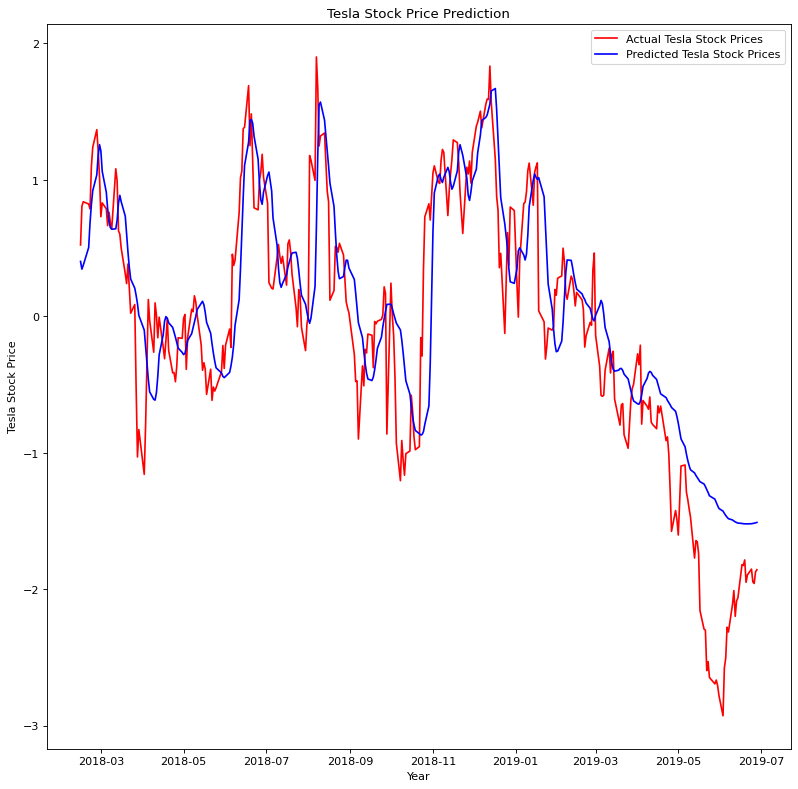

In [59]:
# Visualising RNN_predictions
#(Note that at this stage it will visualise normalised values)
figure(figsize=(12, 12), dpi=80)
pyplot.plot((test.index[30:]),y_test, color = 'red', label = 'Actual Tesla Stock Prices')
pyplot.plot((test.index[30:]),RNN_predictions, color = 'blue', label = 'Predicted Tesla Stock Prices')
pyplot.title('Tesla Stock Price Prediction')
pyplot.xlabel('Year')
pyplot.ylabel('Tesla Stock Price')
pyplot.legend()
pyplot.show()

In [60]:
#inverse the normalised values

#(inversed_value * std + mean)
RNN_predictions = Series(RNN_predictions)

RNN_predictions_processed = []


In [61]:
#for each value in RNN_predictions
for val in RNN_predictions.values:
  #multiply val by test data standard deviation and then add 
  #test data mean to it
  val = (val * test_std) + test_mean
  #append this updated value to RNN_predictions_processed
  RNN_predictions_processed.append(val)

print(RNN_predictions_processed)

[63.462002968735135, 62.99315140459691, 63.22685931515797, 64.30817834642997, 65.81414548990504, 66.92252869799715, 67.76729780032315, 68.73156242202495, 69.91547145771762, 70.57179371756497, 70.19041302614825, 68.94650587957948, 67.67445985376047, 66.66253836996437, 65.91862538578809, 65.52525359057485, 65.42329899777533, 65.44783935727563, 65.98266180247772, 67.02177226724709, 67.48255662959524, 67.09393977356712, 66.21915972969323, 65.12961402465764, 64.0206597880393, 63.08954181223395, 62.38592051172351, 61.83780828141273, 61.39676736655442, 60.891241520081, 60.17852689285975, 59.2809283851789, 58.27031920219582, 57.238052536599916, 56.28278867156414, 55.51794400035632, 55.06361627191678, 55.01680084734727, 55.4756834321232, 56.4720888376774, 57.771465487278434, 59.0036591202406, 59.8209086901172, 60.10255929043896, 59.991096308902094, 59.72730272752063, 59.44130568404796, 59.15101729062681, 58.850148526069155, 58.523501265570964, 58.19049208860184, 57.922145206292896, 57.788067411

In [62]:
print(test_data_series.values[30:])

[64.461998 66.814003 67.098    66.954002 66.660004 69.234001 70.410004
 71.484001 70.197998 68.612    66.185997 67.024002 66.669998 65.639999
 66.459999 65.82     65.433998 69.101997 68.367996 65.325996 65.120003
 64.269997 62.712002 62.110001 63.306    61.82     60.307999 60.835999
 55.835999 51.556    53.226002 50.495998 53.506001 57.388    61.144001
 59.860001 57.931999 60.939999 60.186001 58.816002 60.068001 58.242001
 57.537998 58.669998 60.015999 58.048    56.674    56.692001 56.138
 57.096001 58.816002 58.779999 59.984001 60.23     56.889999 58.818001
 60.554001 60.394001 61.369999 61.004002 60.212002 58.394001 56.835999
 57.296001 56.908001 55.363998 56.897999 55.001999 55.813999 55.57
 55.77     56.751999 58.344002 56.945999 58.363998 59.348    58.226002
 63.900002 63.217999 63.532001 66.419998 68.554001 68.956001 71.543999
 71.634003 74.166    70.510002 72.444    69.501999 66.725998 66.601997
 68.400002 68.900002 69.986    68.589996 67.014    62.172001 61.832001
 61.779999 63

Root Mean Square Error is  4.088374273039734


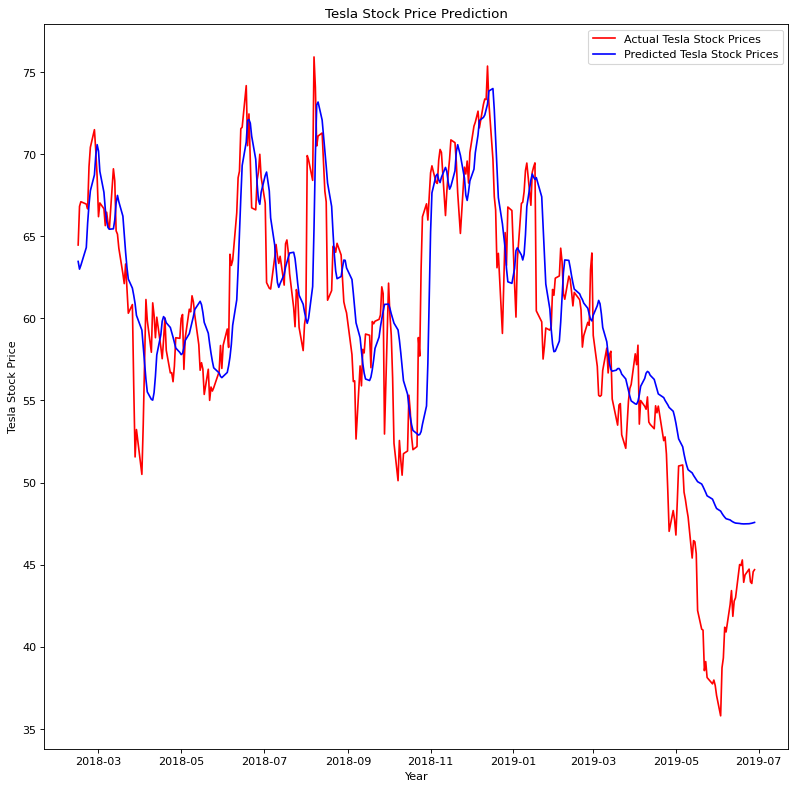

In [63]:
#Calculating Root mean square error of forecasted and actual values
rmse = sqrt(mean_squared_error(test_data_series.values[30:], Series(RNN_predictions_processed)))
print('Root Mean Square Error is ', rmse)
# Visualising RNN_predictions
figure(figsize=(12, 12), dpi=80)
pyplot.plot((test.index[30:]),test_data_series.values[30:], color = 'red', label = 'Actual Tesla Stock Prices')
pyplot.plot((test.index[30:]),RNN_predictions_processed, color = 'blue', label = 'Predicted Tesla Stock Prices')
pyplot.title('Tesla Stock Price Prediction')
pyplot.xlabel('Year')
pyplot.ylabel('Tesla Stock Price')
pyplot.legend()
pyplot.show()

In [64]:
#Creating an Ensemble Method
ensemble_result = []
for ar,rnn in zip(ARIMA_predictions_series[30:].values,Series(RNN_predictions_processed).values):
  result = (ar + rnn)/2
  ensemble_result.append(result)


In [65]:
print(ensemble_result)

[array([64.13677354]), array([63.73842984]), array([65.07182431]), array([65.72367862]), array([66.39768885]), array([66.80243638]), array([68.55572943]), array([69.60615597]), array([70.73422607]), array([70.38136646]), array([69.39145206]), array([67.53920773]), array([67.3785723]), array([66.67613235]), array([65.77729003]), array([66.02154926]), array([65.62667659]), array([65.44969449]), array([67.61739002]), array([67.69982319]), array([66.37201035]), array([66.1215756]), array([65.24594865]), array([63.91039288]), array([63.07070846]), array([63.23257824]), array([62.09263783]), array([61.06317955]), array([61.14050914]), array([58.29804013]), array([55.792179]), array([56.30439277]), array([54.34530068]), array([55.43039118]), array([56.91737383]), array([58.42884526]), array([57.44773676]), array([56.44799293]), array([58.28463848]), array([58.3237894]), array([58.2825754]), array([59.57627579]), array([59.00831163]), array([58.82424924]), array([59.36609333]), array([59.90794

Root Mean Square Error is  2.707728163086232


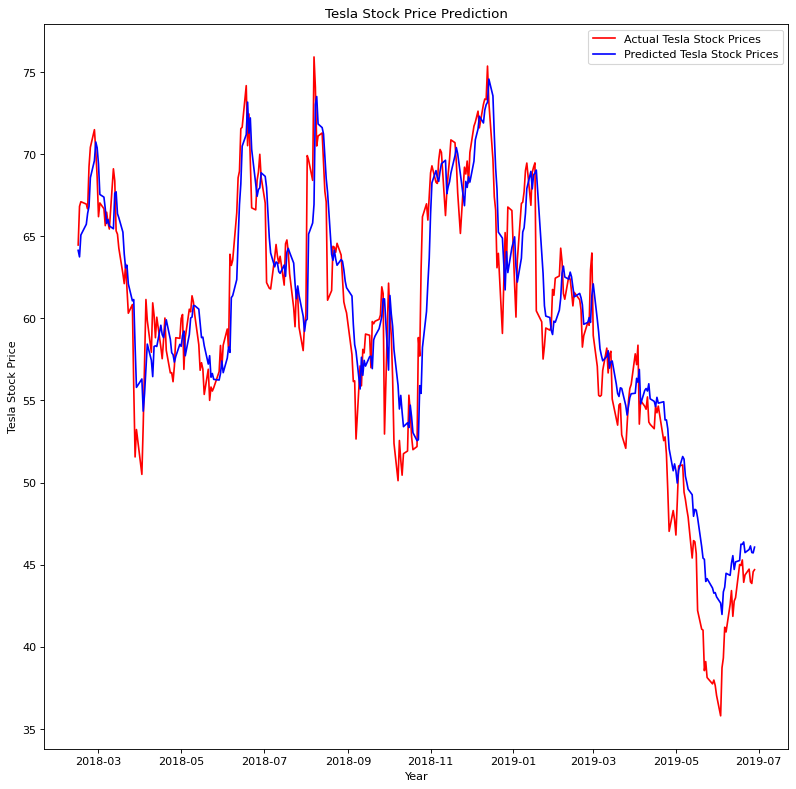

In [66]:
#RMSE of ensemble
rmse = sqrt(mean_squared_error(test_data_series.values[30:], Series(ensemble_result)))
print('Root Mean Square Error is ', rmse)
# Visualising ensemble methods
figure(figsize=(12, 12), dpi=80)
pyplot.plot((test.index[30:]),test_data_series.values[30:], color = 'red', label = 'Actual Tesla Stock Prices')
pyplot.plot((test.index[30:]),Series(ensemble_result), color = 'blue', label = 'Predicted Tesla Stock Prices')
pyplot.title('Tesla Stock Price Prediction')
pyplot.xlabel('Year')
pyplot.ylabel('Tesla Stock Price')
pyplot.legend()
pyplot.show()